In [8]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier


In [10]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\KNN_Project_Data")

In [12]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [14]:
df['TARGET CLASS'].value_counts()

TARGET CLASS
0    500
1    500
Name: count, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [18]:
#split data
x = df.drop(['TARGET CLASS'], axis = 1)
y = df['TARGET CLASS']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state= 0)

In [27]:
scaler = StandardScaler()

In [29]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
knn = KNeighborsClassifier()

In [33]:
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [35]:
knn_pred = knn.predict(x_test)

In [43]:
print(knn_pred.shape)
print(y_test.shape)


(200,)
(200,)


In [47]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.78       109
           1       0.72      0.81      0.76        91

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.78      0.77      0.77       200



In [49]:
cm = confusion_matrix(y_test,knn_pred)

In [51]:
cm

array([[80, 29],
       [17, 74]], dtype=int64)

<Axes: >

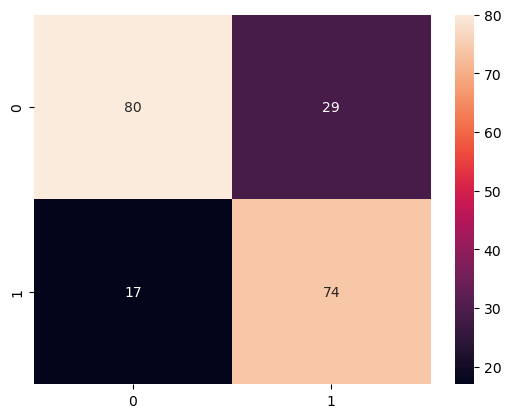

In [55]:
sns.heatmap(cm, annot= True)

In [61]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = knn.classes_)

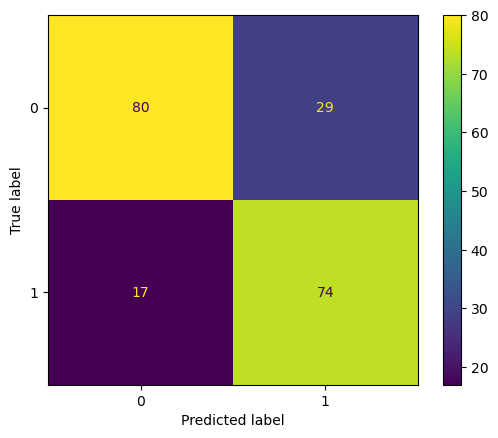

In [65]:
cm_plot.plot()

In [76]:
model = KNeighborsClassifier()
params = {
    'n_neighbors' : list(range(1,30)),
    'p':[1,2] # 1--> Manhattan| 2--> ecuildien
}

In [78]:
gs_model = GridSearchCV(model,params)

In [80]:
#fit gird
gs_model.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [82]:
gs_model.best_estimator_

KNeighborsClassifier(n_neighbors=28)

In [84]:
gs_model.best_params_

{'n_neighbors': 28, 'p': 2}

In [86]:
## fit knn model --> with best_params_
model = KNeighborsClassifier(n_neighbors= 28, p= 2)
model.fit(x_train,y_train)
y_pre = model.predict(x_test)

In [88]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       109
           1       0.74      0.82      0.78        91

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.79       200



In [92]:
cm = confusion_matrix(y_test,y_pre)

In [94]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = knn.classes_)

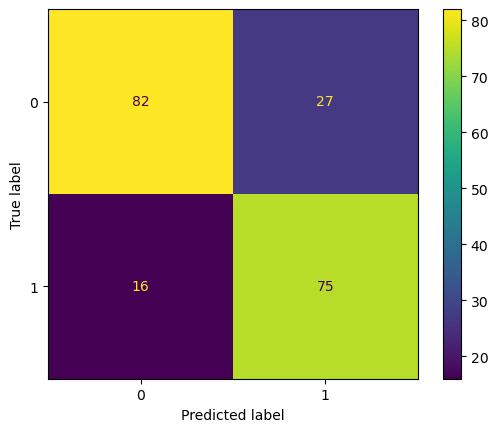

In [96]:
cm_plot.plot()

In [106]:
scores = []
for i in range(1,30):
    model = KNeighborsClassifier(n_neighbors= i)
    model.fit(x_train,y_train)
    y_pre = model.predict(x_test)
    scores.append(model.score(x_test,y_test))

In [108]:
scores

[0.725,
 0.74,
 0.76,
 0.76,
 0.77,
 0.78,
 0.765,
 0.785,
 0.795,
 0.8,
 0.775,
 0.79,
 0.78,
 0.8,
 0.78,
 0.805,
 0.79,
 0.795,
 0.775,
 0.79,
 0.79,
 0.8,
 0.78,
 0.79,
 0.78,
 0.78,
 0.77,
 0.785,
 0.785]

In [112]:
import matplotlib.pyplot as plt

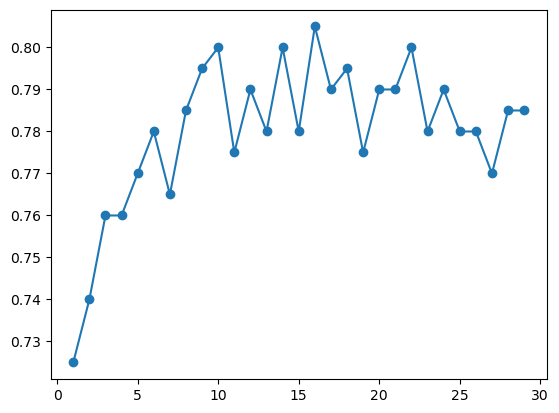

In [116]:
plt.plot(range(1,30),scores,marker = 'o')

In [136]:
## fit knn model --> with best_params_
model = KNeighborsClassifier(n_neighbors= 16, p= 2)
model.fit(x_train,y_train)
y_pre = model.predict(x_test)

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       109
           1       0.75      0.85      0.80        91

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200



In [140]:
cm = confusion_matrix(y_test,y_pre)

In [142]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = knn.classes_)

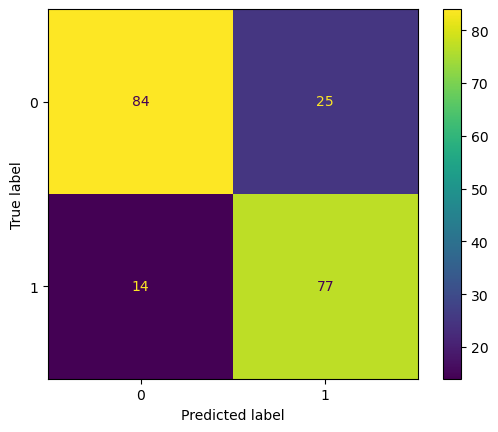

In [144]:
cm_plot.plot()